<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/Model/BERT/BERT_STS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 데이터 불러오기

In [1]:
ls

drive/  sample_data/


In [5]:
cd drive/MyDrive/Pytorch \NLP/BERT/data_in/KorNLUDatasets/KorSTS

/content/drive/MyDrive/Pytorch NLP/BERT/data_in/KorNLUDatasets/KorSTS


In [6]:
ls

sts-dev.tsv  sts-test.tsv  sts-train.tsv


In [7]:
import pandas as pd

In [9]:
train_df = pd.read_csv('sts-train.tsv',sep='\t',quoting=3)
train_df

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,1,5.00,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.
1,main-captions,MSRvid,2012test,4,3.80,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.
2,main-captions,MSRvid,2012test,5,3.80,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.
3,main-captions,MSRvid,2012test,6,2.60,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.
4,main-captions,MSRvid,2012test,9,4.25,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.
...,...,...,...,...,...,...,...
5744,main-news,headlines,2016,1456,0.00,폭풍우 클로다흐가 영국을 강타하면서 심한 강풍,메르켈은 나토와 라트비아의 연대를 약속한다.
5745,main-news,headlines,2016,1465,0.00,리비아 테러리스트들이 공습에 대한 복수로 찍은 수십 명의 이집트 인질들,나일강에서 더 많은 시체가 발견되면서 이집트 보트 충돌 사고 사망자 수가 증가한다.
5746,main-news,headlines,2016,1466,0.00,바레인으로 향하는 대통령,시 주석 : 에볼라 퇴치를 계속 돕기 위한 중국
5747,main-news,headlines,2016,1470,0.00,"중국, 인도는 양국 관계를 증진시키겠다고 맹세한다",중국은 불안한 주식 거래자들을 안심시키기 위해 뒤뚱거리고 있다.


## Transformers의 BertTokenizer 불러오기

In [11]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.2 MB/s eta 0:00:00


In [12]:
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

In [13]:
tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

In [16]:
cache_dir = '.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba'

## 문장 길이 분석

In [17]:
# 두 sentence 합치기

sentence = pd.Series(train_df.sentence1.astype(str).tolist()+ train_df.sentence2.astype(str).tolist())
sentence

0                                         비행기가 이륙하고 있다.
1                                 한 남자가 큰 플루트를 연주하고 있다.
2                                한 남자가 피자에 치즈를 뿌려놓고 있다.
3                                      세 남자가 체스를 하고 있다.
4                                    한 남자가 첼로를 연주하고 있다.
                              ...                      
11493                          메르켈은 나토와 라트비아의 연대를 약속한다.
11494    나일강에서 더 많은 시체가 발견되면서 이집트 보트 충돌 사고 사망자 수가 증가한다.
11495                        시 주석 : 에볼라 퇴치를 계속 돕기 위한 중국
11496               중국은 불안한 주식 거래자들을 안심시키기 위해 뒤뚱거리고 있다.
11497                 가장 최근의 심한 날씨 : 토네이도 후 텍사스에서 1명 사망
Length: 11498, dtype: object

In [18]:
sen_len = sentence.apply(lambda x : len(tokenizer.tokenize(x)))
sen_len

0         8
1        12
2        15
3         8
4        11
         ..
11493    17
11494    29
11495    14
11496    23
11497    22
Length: 11498, dtype: int64

In [19]:
import matplotlib.pyplot as plt

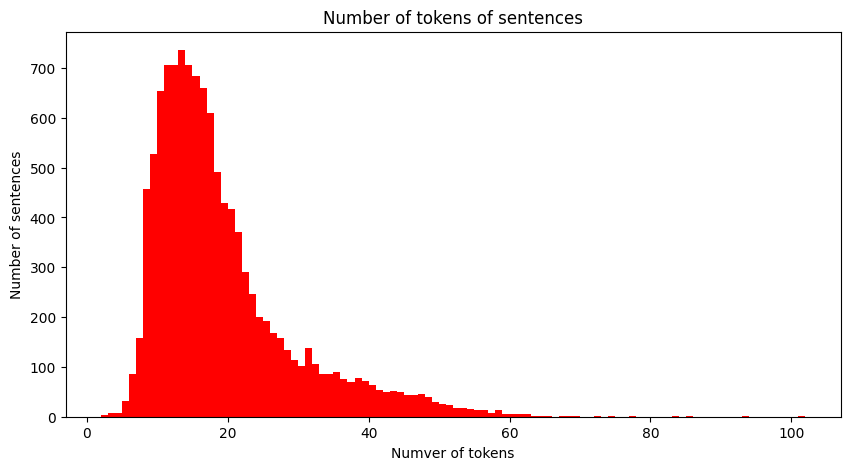

In [23]:
# histogram

plt.figure(figsize=(10,5))

plt.hist(sen_len, bins=100,color='r')

plt.title('Number of tokens of sentences')
plt.xlabel('Numver of tokens')
plt.ylabel('Number of sentences')
plt.show()

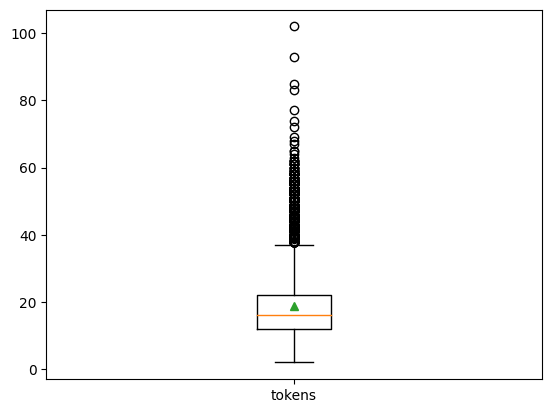

In [24]:
# boxplot

plt.boxplot(sen_len,labels=['tokens'],showmeans=True)
plt.show()

In [ ]:
# statistic